In [85]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
from folium.plugins import MarkerCluster
import folium
from sklearn.cluster import KMeans

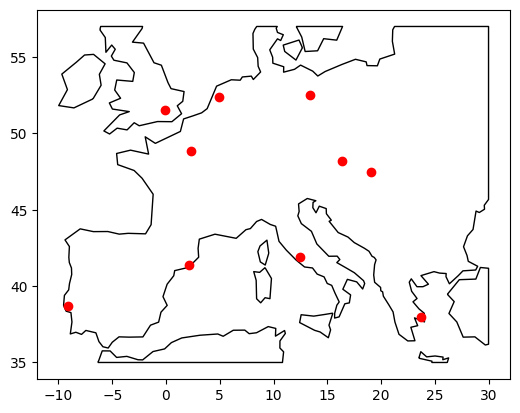

In [86]:
df = pd.DataFrame(
    {
        "City": ["Amsterdam", "Athens", "Barcelona", "Berlin", "Budapest", "Lisbon", "London", "Paris", "Rome", "Vienna"],
        "Country": ["Netherlands", "Greece", "Spain", "Germany", "Hungary", "Portugal", "England", "France", "Italy", "Austria"],
        "Latitude": [52.3727, 37.9841, 41.3827, 52.52, 47.4925, 38.7252, 51.5072, 48.8566, 41.8933, 48.2083],
        "Longitude": [4.8957, 23.7280, 2.1769, 13.405, 19.0513, -9.15, -0.1275, 2.3522, 12.4827, 16.3725],
    }
)

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

world = geopandas.read_file(get_path("naturalearth.land"))

ax = world.clip([-12, 35, 30, 57]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red")

plt.show()

In [87]:
lats = np.array([52.3727, 37.9841, 41.3827, 52.52, 47.4925, 38.7252, 51.5072, 48.8566, 41.8933, 48.2083])
lons = np.array([4.8957, 23.7280, 2.1769, 13.405, 19.0513, -9.15, -0.1275, 2.3522, 12.4827, 16.3725])
cities = np.array(["Amsterdam", "Athens", "Barcelona", "Berlin", "Budapest", "Lisbon", "London", "Paris", "Rome", "Vienna"])

location = list(zip(lats,lons))
popups = ["{}".format(cities) for (cities) in cities] 
popups

m1 = folium.Map(
    location=[48.1375, 11.575],
    tiles='openstreetmap', 
    zoom_start=5
)

marker_cluster = MarkerCluster(
    locations=location,
    popups=popups,
    name="1000 clustered icons",
    overlay=True,
    control=True 
)


marker_cluster.add_to(m1)

folium.LayerControl().add_to(m1)

m1

In [112]:
#Исследуемые города: Париж, Берлин, Амстердам

df_am_1 = pd.read_csv('datasets/amsterdam_weekdays.csv')
df_am_2 = pd.read_csv('datasets/amsterdam_weekends.csv')

df = pd.concat([df_am_1, df_am_2])
df.insert(1, 'City', 'Amsterdam')
df = df.drop('Unnamed: 0', axis=1)
df.index = range(1, len(df) + 1)

df


,City,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1,Amsterdam,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
2,Amsterdam,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
3,Amsterdam,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
4,Amsterdam,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
5,Amsterdam,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,Amsterdam,473.132894,Entire home/apt,False,False,2.0,False,0,0,9.0,98.0,0,1.911795,1.723938,283.762206,15.023909,351.969002,30.683248,4.86742,52.36629
2077,Amsterdam,491.645771,Entire home/apt,False,False,3.0,False,0,0,10.0,98.0,2,1.478016,1.465641,241.418512,12.782005,312.785000,27.267344,4.88066,52.38412
2078,Amsterdam,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943031,0.388542,257.946814,13.657103,336.589450,29.342520,4.90688,52.35794
2079,Amsterdam,399.315727,Entire home/apt,False,False,2.0,False,0,0,9.0,89.0,1,3.719001,0.882094,156.045916,8.261917,189.962216,16.560145,4.86056,52.34639


In [113]:
df = df.drop_duplicates()

In [114]:
coordinates = df[['lat', 'lng']]
kmeans = KMeans(n_clusters=10)
df['cluster'] = kmeans.fit_predict(coordinates)

C:\Users\varla\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [128]:
median_by_cluster = df.groupby('cluster')['rest_index_norm'].median().reset_index(name='median') 
count_by_cluster = df.groupby('cluster')['City'].count().reset_index(name='count') 
result = pd.merge(median_by_cluster, count_by_cluster)
result

,cluster,median,count
0,0,50.746597,295
1,1,6.327729,57
2,2,6.922512,91
3,3,15.998925,228
4,4,13.222987,191
5,5,14.635644,186
6,6,4.939226,81
7,7,10.131335,91
8,8,35.526435,448
9,9,26.876688,412


In [139]:
df.pivot_table(
                index = 'cluster',
                aggfunc = {'City':'count', 'rest_index_norm':'median', 'attr_index_norm':'median', 'realSum':('max', 'mean')}
                )

City attr_index_norm      realSum             rest_index_norm
        count          median          max        mean          median
cluster                                                               
0         295       24.825052  3638.131840  668.463010       50.746597
1          57        3.270644  1210.601551  394.345247        6.327729
2          91        3.752082   987.040986  341.580478        6.922512
3         228        8.467725  2058.913130  499.969988       15.998925
4         191        6.805620  1167.482952  441.838047       13.222987
5         186        7.902143  2486.584023  482.990302       14.635644
6          81        2.616811   940.407283  334.782482        4.939226
7          91        5.508754  8130.668104  584.750941       10.131335
8         448       19.924013  3005.413259  664.118600       35.526435
9         412       14.411813  2175.614557  668.061294       26.876688

In [ ]:
data_flats.boxplot(column = ['livesp', 'totsp'], figsize=(12,8), whis=2.3)

<Axes: title={'center': 'rest_index_norm'}, xlabel='cluster'>

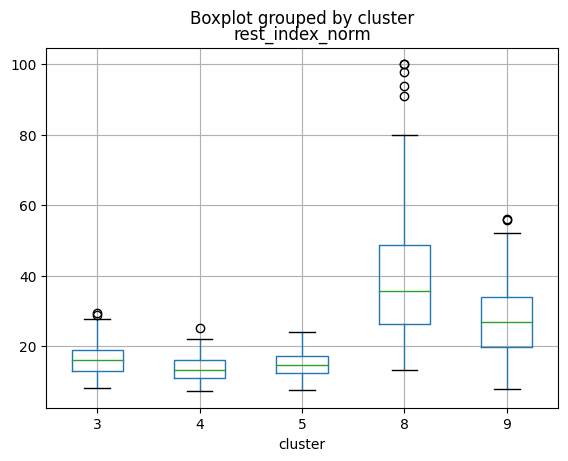

In [148]:
df.query('cluster == [3,4,5,8,9]').boxplot(column = 'rest_index_norm', by = 'cluster')

In [199]:
# Проверка на дубликаты
# 128 предложений совпадают. Большая часть дублируется выходные/будни. Однако есть предложения, находящиеся по одному адресу.
# Можно видеть по позиции 397 398, 437. Широта/долгота совпадают. Количество спален - нет.

duplicateRows1 = df[df.duplicated([
    'lng',
    #'lat'
])]
duplicateRows2 = duplicateRows1[duplicateRows1.duplicated([
    #'lng',
    'lat'
])]

duplicateRows2

,City,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,cluster
397,Amsterdam,855.341785,Entire home/apt,False,False,6.0,False,0,1,10.0,...,1,2.580980,0.823666,145.045704,7.680266,181.128995,12.621329,4.91000,52.39400,7
398,Amsterdam,675.837180,Entire home/apt,False,False,4.0,False,0,1,10.0,...,1,2.580977,0.823676,145.045846,7.680274,181.129054,12.621333,4.91000,52.39400,7
437,Amsterdam,968.293769,Entire home/apt,False,False,6.0,False,0,1,9.0,...,2,2.581013,0.823676,145.043987,7.680176,181.126738,12.621172,4.91000,52.39400,7
662,Amsterdam,313.312868,Private room,False,True,2.0,True,0,0,10.0,...,1,3.615053,2.341554,113.945025,6.033465,141.711839,9.874685,4.94600,52.37600,4
719,Amsterdam,251.915731,Private room,False,True,2.0,False,0,1,8.0,...,1,2.527532,0.339717,268.848216,14.235692,353.789620,24.652570,4.89075,52.35056,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Amsterdam,283.786001,Private room,False,True,2.0,True,1,0,10.0,...,1,5.272025,0.739309,99.657586,5.276413,125.354934,10.927941,4.85800,52.33100,3
2048,Amsterdam,870.339559,Private room,False,True,4.0,True,1,0,10.0,...,2,0.619303,0.394440,518.285628,27.440851,956.478438,83.381960,4.89000,52.36800,0
2050,Amsterdam,356.431467,Private room,False,True,2.0,True,0,0,10.0,...,1,0.721172,0.218169,441.279504,23.363729,573.320786,49.979810,4.90369,52.37311,0
2052,Amsterdam,339.090291,Private room,False,True,4.0,False,0,0,9.0,...,1,2.849476,0.961915,152.597656,8.079347,191.424277,16.687602,4.85189,52.37769,5


In [200]:
df_cluster_9 = df.query('cluster == 9')
df_cluster_9

,City,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,cluster
13,Amsterdam,675.602840,Entire home/apt,False,False,4.0,False,0,0,8.0,...,1,2.933046,0.628073,214.923342,11.380334,269.624904,18.787851,4.88934,52.34697,9
17,Amsterdam,368.851499,Private room,False,True,2.0,False,0,0,10.0,...,1,1.327797,0.119528,539.012884,28.541090,573.896572,39.989939,4.88971,52.36148,9
27,Amsterdam,295.034331,Private room,False,True,2.0,False,1,0,10.0,...,1,3.366019,0.225882,170.028697,9.003133,217.155231,15.131689,4.89500,52.34300,9
32,Amsterdam,599.676611,Entire home/apt,False,False,4.0,False,0,0,9.0,...,3,3.363591,0.697422,156.237115,8.272859,198.874121,13.857835,4.90806,52.34442,9
37,Amsterdam,310.969465,Entire home/apt,False,False,2.0,False,1,0,9.0,...,0,4.147087,0.038355,118.778885,6.289421,151.376393,10.548125,4.92058,52.33997,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,Amsterdam,372.600942,Private room,False,True,2.0,False,1,0,10.0,...,1,3.081543,0.496081,189.216620,10.018154,249.254482,21.729008,4.89596,52.34559,9
2060,Amsterdam,755.981534,Entire home/apt,False,False,4.0,False,0,0,9.0,...,3,2.010832,0.565089,270.987953,14.347571,352.973082,30.770780,4.90325,52.35626,9
2074,Amsterdam,405.642912,Private room,False,True,4.0,True,0,0,10.0,...,1,2.169236,0.212117,224.435844,11.882850,291.789702,25.437058,4.91118,52.35718,9
2078,Amsterdam,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,...,5,1.943031,0.388542,257.946814,13.657103,336.589450,29.342520,4.90688,52.35794,9


In [202]:
np.array(df_cluster_9['lng'])

array([4.88934, 4.88971, 4.895  , 4.90806, 4.92058, 4.91113, 4.9075 ,
       4.89   , 4.89663, 4.90258, 4.91979, 4.90733, 4.90441, 4.89575,
       4.90042, 4.90867, 4.89768, 4.89072, 4.92111, 4.897  , 4.91029,
       4.89247, 4.89006, 4.89051, 4.893  , 4.89297, 4.89525, 4.9117 ,
       4.89016, 4.90945, 4.90493, 4.89921, 4.89712, 4.89462, 4.89677,
       4.88971, 4.903  , 4.89268, 4.90366, 4.919  , 4.89319, 4.89871,
       4.90795, 4.89098, 4.90341, 4.89924, 4.89156, 4.90933, 4.90959,
       4.91948, 4.90917, 4.89646, 4.90002, 4.90741, 4.89285, 4.90341,
       4.89078, 4.91163, 4.88954, 4.894  , 4.89581, 4.88968, 4.89034,
       4.88398, 4.89877, 4.90526, 4.88359, 4.90645, 4.90647, 4.8973 ,
       4.9097 , 4.89654, 4.89683, 4.91716, 4.88828, 4.9073 , 4.92006,
       4.9206 , 4.92124, 4.911  , 4.89339, 4.89783, 4.90378, 4.89895,
       4.87961, 4.9    , 4.91403, 4.88691, 4.89903, 4.88846, 4.9035 ,
       4.8948 , 4.90108, 4.90276, 4.89139, 4.89313, 4.88719, 4.90275,
       4.89118, 4.89

In [208]:
#Визуализация выбранного кластера на карте

location_cl9 = list(zip(np.array(df_cluster_9['lat']),np.array(df_cluster_9['lng'])))
location_all = list(zip(np.array(df['lat']),np.array(df['lng'])))
popups_cl9 = ["lng:{}<br>lat:{}".format(lng, lat) for (lng, lat) in location_cl9] 
popups_all = ["lng:{}<br>lat:{}".format(lng, lat) for (lng, lat) in location_all] 


m2 = folium.Map(
    location=[48.1375, 11.575],
    tiles='openstreetmap', 
    zoom_start=5
)

marker_cluster_cl9 = MarkerCluster(
    locations=location_cl9,
    popups=popups_cl9,
    name="cluster 9",
    overlay=True,
    control=True 
)

marker_cluster_all = MarkerCluster(
    locations=location_all,
    popups=popups_all,
    name="all data",
    overlay=True,
    control=True 
)

marker_cluster_cl9.add_to(m2)
marker_cluster_all.add_to(m2)

folium.LayerControl().add_to(m2)

m2